In [4]:
import numpy as np
import pandas as pd

!wget -q -N https://raw.githubusercontent.com/ucscXena/ucsc-xena-server/master/python/xena_query.py
import xena_query as xena

%matplotlib inline
%qtconsole --colors=linux --ConsoleWidget.font_size=12 --ConsoleWidget.font_family='Consolas'
from matplotlib import pyplot as plt
from sklearn.manifold import TSNE
import seaborn as sns

In [4]:
# Get a list of samples and features for a specific dataset
hub = "https://xena.scellucsc.net"
dataset = "sc002YED"
samples = xena.dataset_samples(hub, dataset)
features = xena.dataset_field(hub, dataset)
print "Found {} samples with {} features in {}".format(len(samples), len(features), dataset)

Found 393 samples with 49922 features in sc002YED


In [5]:
# Get expression vectures for a subset of the features
X = np.array(xena.dataset_probe_values(hub, dataset, samples, features[0:10000]), dtype=np.float32).T
print X.shape

(393, 10000)


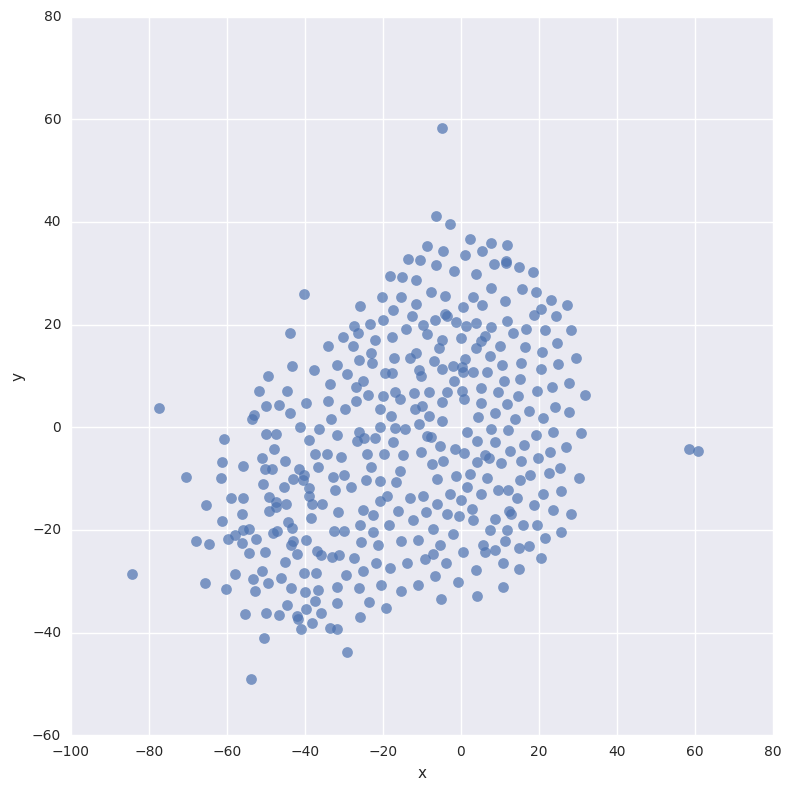

In [10]:
# Plot X
tsne = TSNE(n_components=2, random_state=0).fit_transform(X)
ax = sns.lmplot('x', 'y', pd.DataFrame(tsne, columns=['x','y']),
                fit_reg=False, size=8, scatter_kws={'alpha':0.7, 's':60})

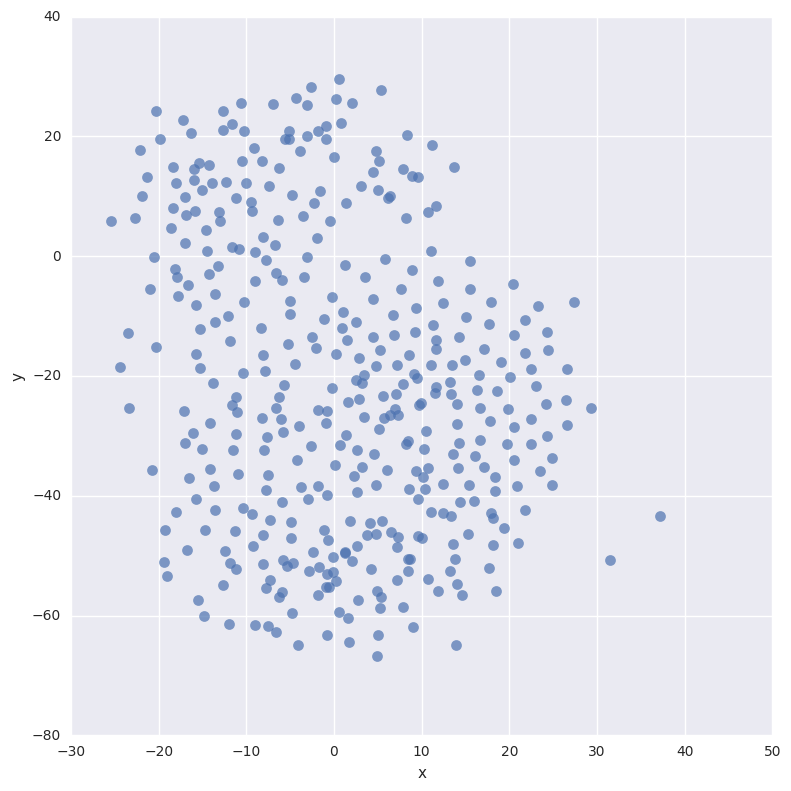

In [11]:
# Plot log(X+1)
tsne = TSNE(n_components=2, random_state=0).fit_transform(np.log(X + 1))
ax = sns.lmplot('x', 'y', pd.DataFrame(tsne, columns=['x','y']),
                fit_reg=False, size=8, scatter_kws={'alpha':0.7, 's':60})